In [122]:
import scanpy as sc

import glob
import os

from typing import Optional


import numpy as np
import anndata
import tables
import scipy.sparse as sp
import pandas as pd
import collections
from typing import Union, Dict, Tuple, List, Callable
from collections import Counter
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import os, sys, string
import h5py
import tables
import anndata
import collections

from harmony import harmonize
import scanpy.external as sce

import scrublet

In [123]:
##pip install scrublet

In [8]:
#sc.__version__
print(sc.__version__)
print(anndata.__version__)
print(h5py.__version__)
print()

1.9.2
0.8.0
3.8.0



In [9]:
home      = "/Users/shayat/Documents/Aachen/projects/training_gcb2023/"
datahome  = home+ "data/"
resulthome= home+ "results/"

In [10]:
filename = 'snRNA-seq-submission_training.h5ad'

## Code start

In [11]:
adata = sc.read_h5ad(datahome+filename)

In [12]:
adata

AnnData object with n_obs × n_vars = 191795 × 29126
    obs: 'sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score', 'dissociation_score', 'cell_type_original', 'patient_region_id', 'patient', 'patient_group', 'major_labl', 'final_cluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id'
    var: 'feature_biotype', 'feature_is_filtered'
    uns: 'X_approximate_distribution', 'X_normalization', 'batch_condition', 'cell_type_original_colors', 'default_embedding', 'schema_version', 'title'
    obsm: 'X_harmony', 'X_pca', 'X_umap'

In [13]:
adata.obs.head()

sample  n_counts  n_genes  \
AAACCCACAAAGGAGA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1  CK158    2598.0     1678   
AAACCCACAGAGATGC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1  CK158   13003.0     4187   
AAACCCAGTAACGGTG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1  CK158    6365.0     2700   
AAACCCAGTCCAGAAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1  CK158     627.0      519   
AAACCCAGTCGTCGGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1  CK158    4488.0     1999   

                                                percent_mito  doublet_score  \
AAACCCACAAAGGAGA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1      0.115473       0.000324   
AAACCCACAGAGATGC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1      0.053834       0.003417   
AAACCCAGTAACGGTG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1      0.047133       0.032239   
AAACCCAGTCCAGAAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1      0.000000       0.000365   
AAACCCAGTCGTCGGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1      0.155971       0.004785   

                                                dissociation_score  \
AAACCCACAAAGGAGA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1            0.137064   
AAACCCACAGAGATGC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1           -0.006482   
AAACCCAGTAACGGTG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1            0.005020   
AAACCCAGTCCAGAAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1            0.087506   
AAACCCAGTCGTCGGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1           -0.001798   

                                               cell_type_original  \
AAACCCACAAAGGAGA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1         Fibroblast   
AAACCCACAGAGATGC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1      Cardiomyocyte   
AAACCCAGTAACGGTG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1      Cardiomyocyte   
AAACCCAGTCCAGAAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1         Fibroblast   
AAACCCAGTCGTCGGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1      Cardiomyocyte   

                                               patient_region_id patient  \
AAACCCACAAAGGAGA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1        control_P1      P1   
AAACCCACAGAGATGC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1        control_P1      P1   
AAACCCAGTAACGGTG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1        control_P1      P1   
AAACCCAGTCCAGAAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1        control_P1      P1   
AAACCCAGTCGTCGGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1        control_P1      P1   

                                               patient_group  ...  \
AAACCCACAAAGGAGA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1      myogenic  ...   
AAACCCACAGAGATGC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1      myogenic  ...   
AAACCCAGTAACGGTG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1      myogenic  ...   
AAACCCAGTCCAGAAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1      myogenic  ...   
AAACCCAGTCGTCGGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1      myogenic  ...   

                                               final_cluster  \
AAACCCACAAAGGAGA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1             2   
AAACCCACAGAGATGC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1             0   
AAACCCAGTAACGGTG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1             3   
AAACCCAGTCCAGAAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1             2   
AAACCCAGTCGTCGGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1             3   

                                               assay_ontology_term_id  \
AAACCCACAAAGGAGA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1            EFO:0009922   
AAACCCACAGAGATGC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1            EFO:0009922   
AAACCCAGTAACGGTG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1            EFO:0009922   
AAACCCAGTCCAGAAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1            EFO:0009922   
AAACCCAGTCGTCGGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1            EFO:0009922   

                                               cell_type_ontology_term_id  \
AAACCCACAAAGGAGA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1                 CL:0002548   
AAACCCACAGAGATGC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1                 CL:0000513   
AAACCCAGTAACGGTG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1                 CL:0000513   
AAACCCAGTCCAGAAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1                 CL:0002548   
AAACCCAGTCGTCGGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1                 CL:0000513   

                                               development_stage_ontology_term_id  \
AAACCCACAAAGGAGA-1_1_1_1_1_1_1_1_1_

In [14]:
adata.obs['sample'].drop_duplicates()

AAACCCACAAAGGAGA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1    CK158
AAACCCACAAGTGGCA-1_2_1_1_1_1_1_1_1_1_1_1_1_1_1    CK159
AAACCCAAGGAACGAA-1_1_1_1_1_1_1_1_1_1_1_1_1_1      CK160
AAACGCTTCCCTCATG-1_2_1_1_1_1_1_1_1_1_1_1_1_1      CK161
AAACCCACAAGGTACG-1_1_1_1_1_1_1_1_1_1_1_1_1        CK162
AAACCCAAGACCTTTG-1_2_1_1_1_1_1_1_1_1_1_1_1        CK163
AAACCCAAGCGAAACC-1_1_1_1_1_1_1_1_1_1_1_1          CK164
AAACCCAAGGCCATAG-1_2_1_1_1_1_1_1_1_1_1_1          CK165
AAACCCACATCGAAGG-1_1_1_1_1_1_1_1_1_1_1            CK356
AAACCCACACCAAAGG-1_2_1_1_1_1_1_1_1_1_1            CK357
AAACCCAAGCTCTTCC-1_1_1_1_1_1_1_1_1_1              CK358
AAACCCACAGCGACCT-1_2_1_1_1_1_1_1_1_1              CK359
AAACCCACAAGCGAGT-1_1_1_1_1_1_1_1_1                CK360
AAACCCAAGTATGCAA-1_2_1_1_1_1_1_1_1                CK361
AAACCCAAGAGTAACT-1_1_1_1_1_1_1_1                  CK362
AAACCCAAGTCTAGCT-1_2_1_1_1_1_1_1                  CK363
AAACCCAAGCTACGTT-1_1_1_1_1_1_1                    CK364
AAACCCAAGACGTCCC-1_2_1_1_1_1_1                  

In [18]:
# Check to make sure it's still counts
adata[:,'TTN'].X.todense()

matrix([[3.00793618],
        [4.95938275],
        [5.39081348],
        ...,
        [0.        ],
        [2.53377047],
        [0.        ]])

In [19]:
adata = adata.raw.to_adata()

In [20]:
# Check to make sure it's still counts
adata[:,'TTN'].X.todense()

matrix([[  5.],
        [184.],
        [139.],
        ...,
        [  0.],
        [  1.],
        [  0.]], dtype=float32)

In [ ]:
sc.pl.violin(adata, ['n_counts', 'n_genes', 'percent_mito'],\
             jitter=0.4, multi_panel=True)

In [21]:
Male   = ["TS100_combined", "TS83", "TS84", "TS86", "TS89_combined", "TS92", "TS93_combined",\
          "TS95_combined", "TS97"]

Female = ["TS101_combined", "TS102_combined", "TS85_combined", "TS87_combined", "TS88", "TS90", "TS91", "TS94_combined",\
          "TS96_combined", "TS98_combined", "TS99_combined"]

def get_treatment(s):
    if s in Male:
        return 'male'
    if s in Female:
        return 'female'
    elif s in other_samples:
        return 'other'
    else:
        raise ValueError(f'sample {s} not in definitions')

#adata.obs['sex'] = adata.obs['sample'].apply(get_treatment).astype('category')

In [30]:
cluster_key = 'cell_type_original'

/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


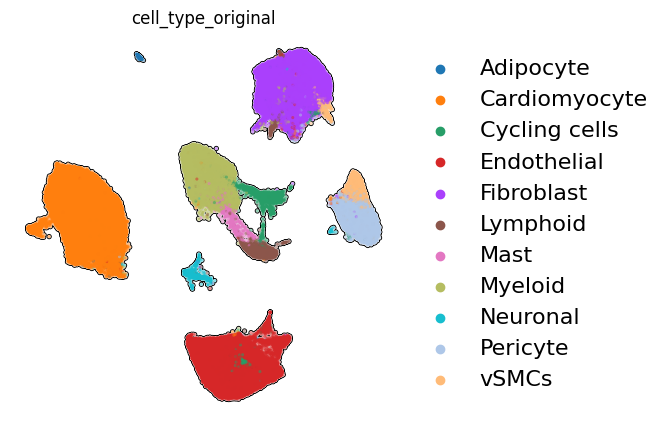

In [31]:
plt.figure(figsize=(5, 5))
sc.pl.embedding(adata, add_outline=True, basis='umap', color=cluster_key,\
                ax=plt.gca(), alpha=0.5, size=20, legend_fontsize=16,legend_fontoutline=8,\
                frameon=False, show=True)

In [35]:
myclusters = [clust for clust in adata.obs[cluster_key].cat.categories]

In [36]:
myclusters

['Adipocyte',
 'Cardiomyocyte',
 'Cycling cells',
 'Endothelial',
 'Fibroblast',
 'Lymphoid',
 'Mast',
 'Myeloid',
 'Neuronal',
 'Pericyte',
 'vSMCs']

In [93]:
target_cells = 5000

adatas = [adata[adata.obs[cluster_key].isin([clust])] for clust in myclusters]

for dat in adatas:
    if dat.n_obs > target_cells:
         sc.pp.subsample(dat, n_obs=target_cells)

adata_downsampled = adatas[0].concatenate(*adatas[1:])

/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from 

In [94]:
adata_downsampled

AnnData object with n_obs × n_vars = 39360 × 29126
    obs: 'sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score', 'dissociation_score', 'cell_type_original', 'patient_region_id', 'patient', 'patient_group', 'major_labl', 'final_cluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'batch'
    var: 'feature_biotype'
    obsm: 'X_harmony', 'X_pca', 'X_umap'

/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


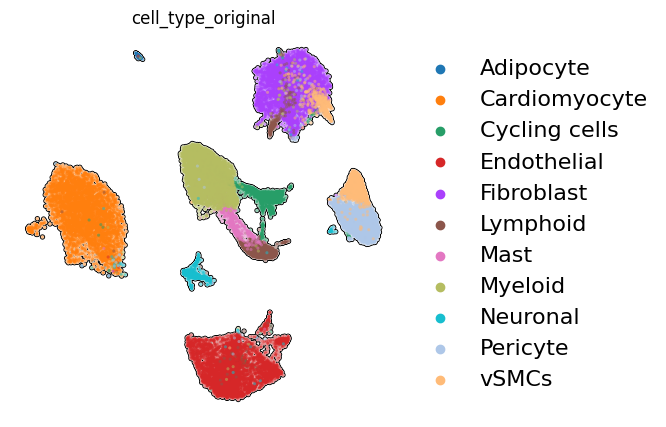

In [95]:
plt.figure(figsize=(5, 5))
sc.pl.embedding(adata_downsampled, add_outline=True, basis='umap', color=cluster_key,\
                ax=plt.gca(), alpha=0.5, size=20, legend_fontsize=16,legend_fontoutline=8,\
                frameon=False, show=True)

In [96]:
adata_downsampled.obs[['patient_region_id', 'patient_group', 'major_labl']]\
.drop_duplicates().sort_values(by='major_labl')

patient_region_id  \
AAAGTCCCATCATCTT-1_1_1_1_1_1_1_1_1_1_1_1_1_1-0            RZ/BZ_P3   
CCTCAACGTACTCGTA-1_2_1_1_1_1_1_1_1_1_1_1_1-0              RZ/BZ_P2   
GATTTCTCAGCGTTGC-1_1_1_1_1_1_1-0                         RZ/BZ_P12   
ACACCAAGTGTCATGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1-0        control_P1   
CTCCACAGTTGAGGAC-1_1-0                                 control_P17   
GTAATCGAGCGATTCT-1_2_1_1_1_1_1_1_1_1_1-0                control_P7   
ATTCACTTCCCGTGTT-1_1_1_1_1_1_1_1_1_1-0                  control_P8   
ACCTGTCGTCTACAGT-1_2_1_1_1_1_1_1_1_1_1_1_1_1_1-0          RZ/FZ_P5   
AAAGGGCTCATAGCAC-1_1_1_1_1_1_1_1_1_1_1_1_1-0              FZ/GT_P4   
AAATGGATCGTGACTA-1_1_1_1-0                                  FZ_P20   
ATCGTAGCAGTATGAA-1_1_1_1_1-0                             FZ/GT_P19   
AAAGGGCGTAGCACGA-1_2_1_1_1_1-0                              FZ_P18   
AACAAGATCTAATTCC-1_1_1_1_1_1-0                              FZ_P14   
AAGCGTTTCACCATAG-1_2_1_1-0                               GT/IZ_P15   
AATGCCACATTGACCA-1_2_1_1_1-0                                IZ_P16   
AAAGTGAAGCTACAAA-1_2_1_1_1_1_1-0                         GT/IZ_P13   
CACCGTTTCGCGTAGC-1_2_1_1_1_1_1_1_1-0                        IZ_P10   
AGCTTCCTCCGTACGG-1_1_1-1                             GT/IZ_P9_rep2   
TTTACGTGTTGCGGCT-1_2_1_1_1_1_1_1_1_1_1_1-0                IZ/BZ_P2   
ACTGATGGTACCTAGT-1_2_1_1_1_1_1_1_1_1_1_1_1_1-0               IZ_P3   
ATCCATTAGAGAGGTA-1_2_1_1_1_1_1_1-0                        GT/IZ_P9   
TGGGTTATCCGTACGG-1_2_1-1                                    IZ_P15   
CAGCACGGTTTCGCTC-1_1_1_1_1_1_1_1-0                          RZ_P11   
ATTTACCAGGCTGGAT-1_1_1_1_1_1_1_1_1-0                         RZ_P9   
AACGAAAGTACGTTCA-1_2_1_1_1_1_1_1_1_1-0                    RZ/GT_P2   
ACACCAATCAGAATAG-1_1_1_1_1_1_1_1_1_1_1-0                     RZ_P6   
AACAAAGCAGAGAGGG-1_1_1_1_1_1_1_1_1_1_1_1-0                   RZ_P3   

                                                 patient_group major_labl  
AAAGTCCCATCATCTT-1_1_1_1_1_1_1_1_1_1_1_1_1_1-0        myogenic         BZ  
CCTCAACGTACTCGTA-1_2_1_1_1_1_1_1_1_1_1_1_1-0          myogenic         BZ  
GATTTCTCAGCGTTGC-1_1_1_1_1_1_1-0                      myogenic         BZ  
ACACCAAGTGTCATGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1-0      myogenic       CTRL  
CTCCACAGTTGAGGAC-1_1-0                                myogenic       CTRL  
GTAATCGAGCGATTCT-1_2_1_1_1_1_1_1_1_1_1-0              myogenic       CTRL  
ATTCACTTCCCGTGTT-1_1_1_1_1_1_1_1_1_1-0                myogenic       CTRL  
ACCTGTCGTCTACAGT-1_2_1_1_1_1_1_1_1_1_1_1_1_1_1-0      myogenic         FZ  
AAAGGGCTCATAGCAC-1_1_1_1_1_1_1_1_1_1_1_1_1-0          fibrotic         FZ  
AAATGGATCGTGACTA-1_1_1_1-0                            fibrotic         FZ  
ATCGTAGCAGTATGAA-1_1_1_1_1-0                          fibrotic         FZ  
AAAGGGCGTAGCACGA-1_2_1_1_1_1-0                        fibrotic         FZ  
AACAAGATCTAATTCC-1_1_1_1_1_1-0                        fibrotic         FZ  
AAGCGTTTCACCATAG-1_2_1_1-0                            ischemic         IZ  
AATGCCACATTGACCA-1_2_1_1_1-0                          ischemic         IZ  
AAAGTGAAGCTACAAA-1_2_1_1_1_1_1-0                      ischemic         IZ  
CACCGTTTCGCGTAGC-1_2_1_1_1_1_1_1_1-0                  ischemic         IZ  
AGCTTCCTCCGTACGG-1_1_1-1                              ischemic         IZ  
TTTACGTGTTGCGGCT-1_2_1_1_1_1_1_1_1_1_1_1-0            ischemic         IZ  
ACTGATGGTACCTAGT-1_2_1_1_1_1_1_1_1_1_1_1_1_1-0        ischemic         IZ  
ATCCATTAGAGAGGTA-1_2_1_1_1_1_1_1-0                    ischemic         IZ  
TGGGTTATCCGTACGG-1_2_1-1                              ischemic         IZ  
CAGCACGGTTTCGCTC-1_1_1_1_1_1_1_1-0                    myogenic         RZ  
ATTTACCAGGCTGGAT-1_1_1_1_1_1_1_1_1-0                  myogenic         RZ  
AACGAAAGTACGTTCA-1_2_1_1_1_1_1_1_1_1-0                myogenic         RZ  
ACACCAATCAGAATAG-1_1_1_1_1_1_1_1_1_1_1-0              myogenic         RZ  
AACAAAGCAGAGAGGG-1_1_1_1_1_1_1_1_1_1

In [97]:
sc.pp.filter_cells(adata_downsampled, min_genes=200)
sc.pp.filter_genes(adata_downsampled, min_cells=3)

In [98]:
adata_downsampled.var['mt'] = adata_downsampled.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_downsampled, qc_vars=['mt'],\
                           percent_top=None, log1p=False, inplace=True)

In [99]:
adata_downsampled

AnnData object with n_obs × n_vars = 39360 × 27593
    obs: 'sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score', 'dissociation_score', 'cell_type_original', 'patient_region_id', 'patient', 'patient_group', 'major_labl', 'final_cluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'feature_biotype', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_type_original_colors'
    obsm: 'X_harmony', 'X_pca', 'X_umap'

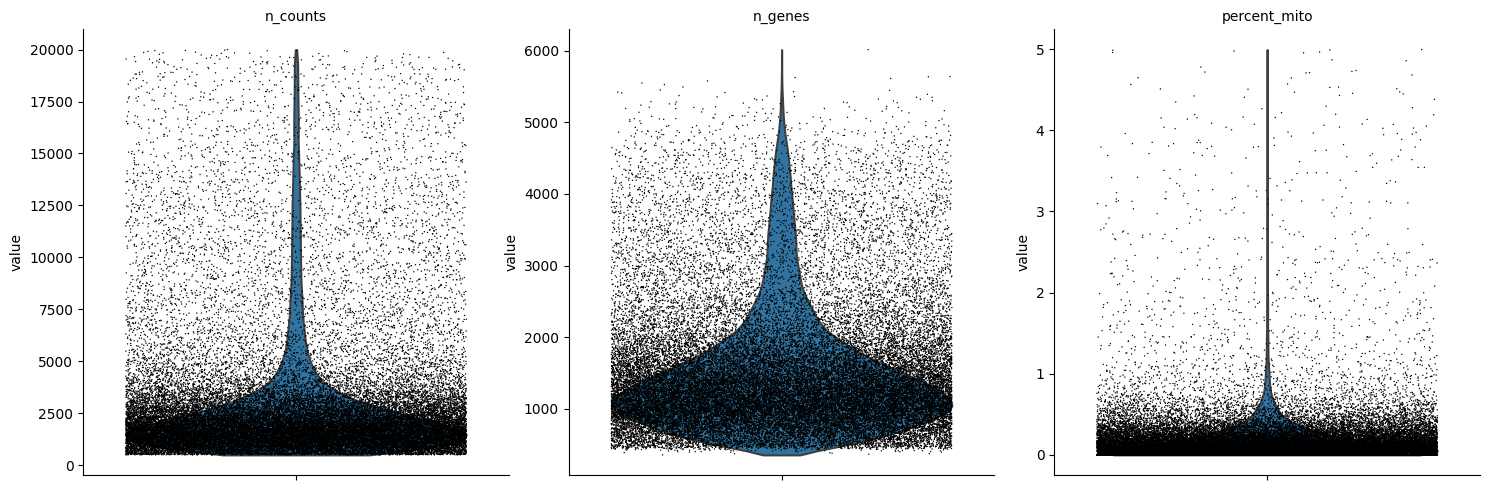

In [100]:
sc.pl.violin(adata_downsampled, ['n_counts', 'n_genes', 'percent_mito'],\
             jitter=0.4, multi_panel=True)

In [101]:
adata_downsampled = adata_downsampled[np.all([adata_downsampled.obs['n_genes'] > 100,
                            adata_downsampled.obs['percent_mito'] < 5,
                            #adata_downsampled.obs['n_gene'] < 2500,
                            adata_downsampled.obs["n_counts"] < 20000
                            #adata_downsampled.obs["nCount_RNA"] > 300
                             ], axis=0)]

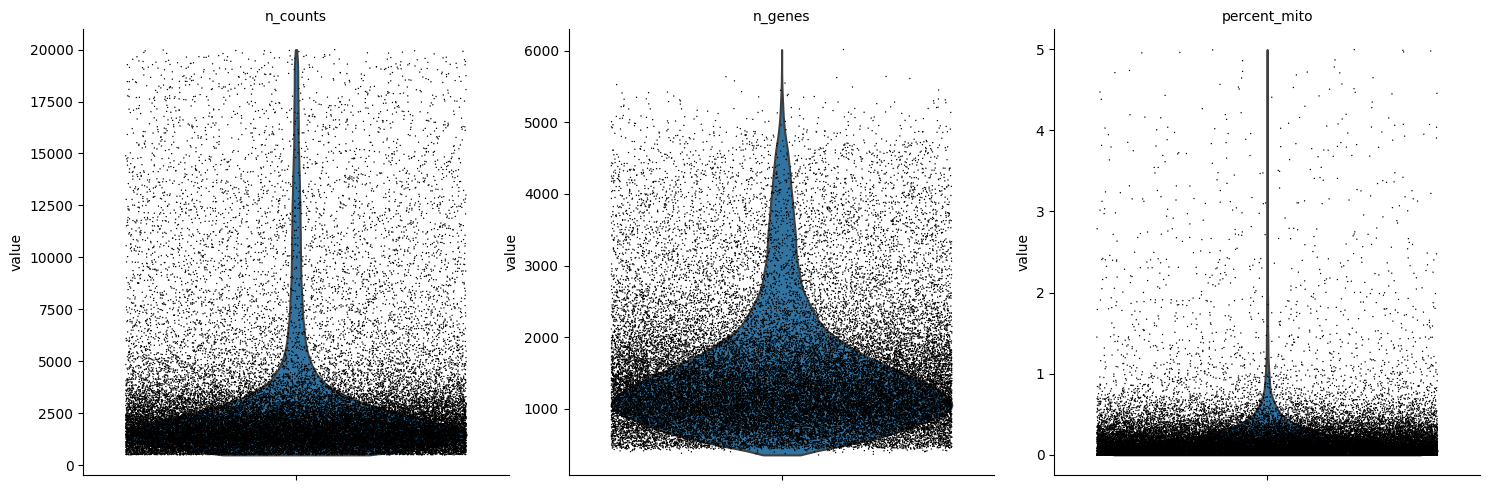

In [102]:
sc.pl.violin(adata_downsampled, ['n_counts', 'n_genes', 'percent_mito'],\
             jitter=0.4, multi_panel=True)

In [103]:
adata_downsampled

View of AnnData object with n_obs × n_vars = 39360 × 27593
    obs: 'sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score', 'dissociation_score', 'cell_type_original', 'patient_region_id', 'patient', 'patient_group', 'major_labl', 'final_cluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'feature_biotype', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_type_original_colors'
    obsm: 'X_harmony', 'X_pca', 'X_umap'

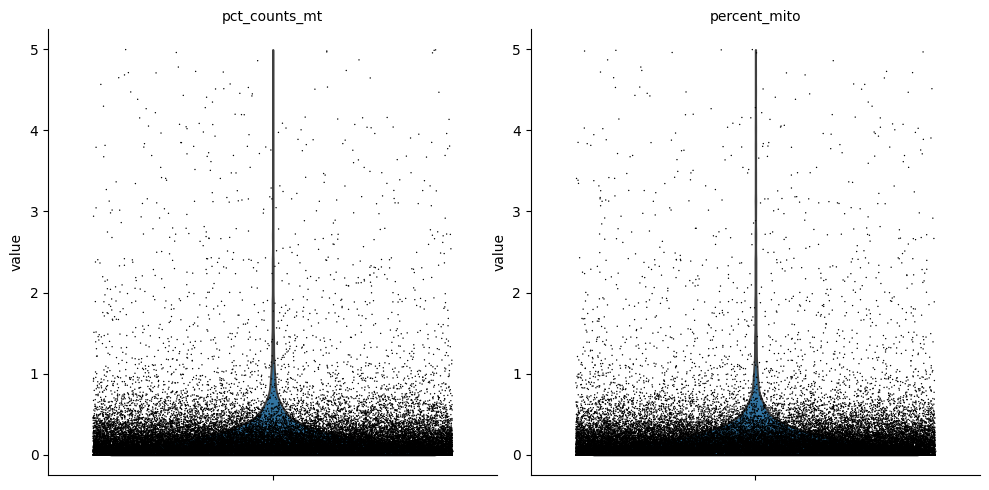

In [104]:
sc.pl.violin(adata_downsampled, ['pct_counts_mt', 'percent_mito'],\
             jitter=0.4, multi_panel=True)

/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


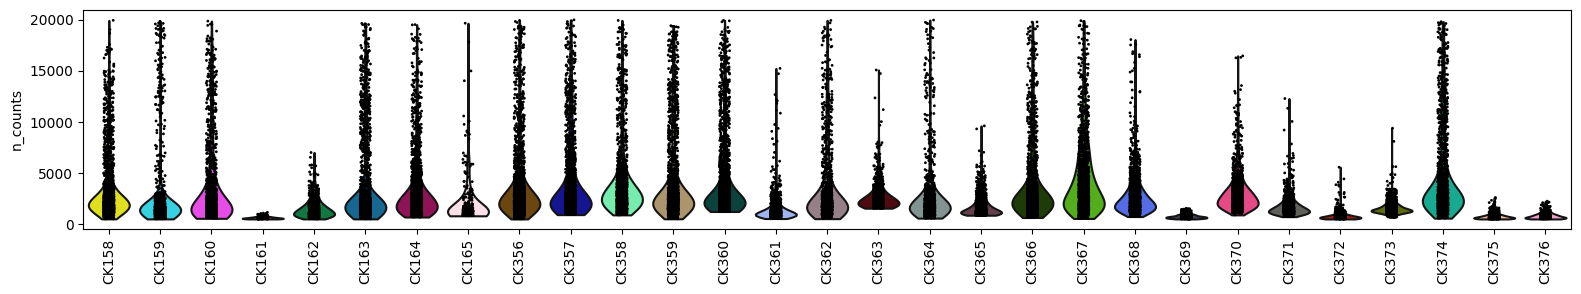

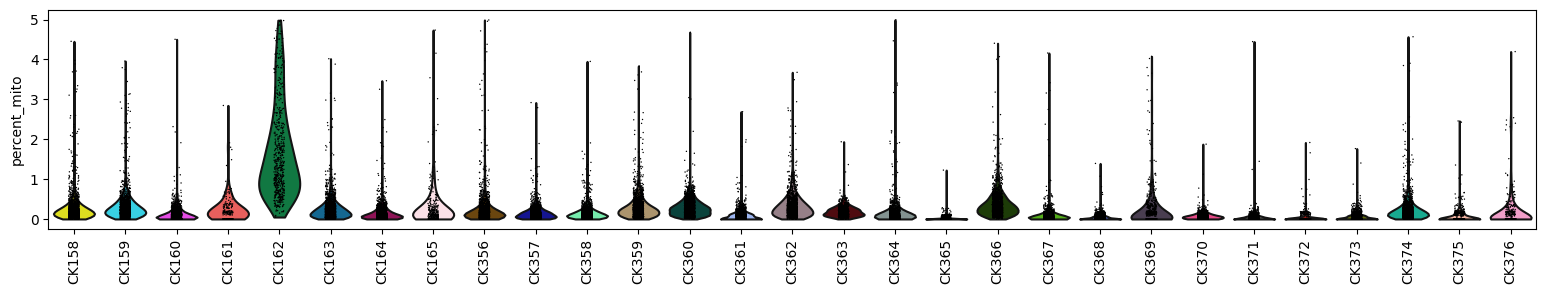

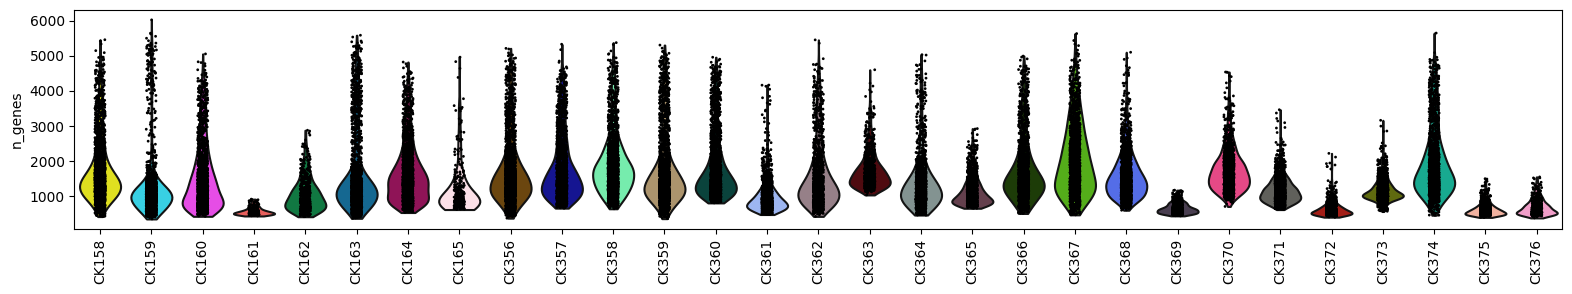

In [105]:
from matplotlib.pyplot import rc_context

#'n_counts', 'n_genes', 'percent_mito'

with rc_context({'figure.figsize': (15, 3)}):
    #ax = temp_counter_df.plot.bar(x='orig.ident', y="index", rot=90,)
    
    t1 = sc.pl.violin(adata_downsampled, 'n_counts', groupby='sample', size=2, log=False, rotation=90, cut=0)#, figsize=(6,4))
    t2 = sc.pl.violin(adata_downsampled, 'percent_mito', groupby='sample', rotation=90)#, figsize=(6,4))
    t4 = sc.pl.violin(adata_downsampled, 'n_genes',
                      groupby='sample', size=2, log=False, rotation=90, cut=0)#, figsize=(6,4))

In [106]:
sample_key = 'sample'
key_added  = 'scrublet'
expected_doublet_rate = 0.1
min_counts = 2
min_cells = 3
min_gene_variability_pctl = 85
n_prin_comps = 30

# Initialize values with NaNs
adata_downsampled.obs[key_added] = np.nan

# go through each sample separately
for i, sample in enumerate(adata_downsampled.obs[sample_key].unique()):
    print(f'\nscrubbing {sample}: {i + 1}/{adata_downsampled.obs[sample_key].nunique()}')

    # subset to data from this sample
    adata_sample = adata_downsampled[adata_downsampled.obs[sample_key] == sample]

    # prepare scrub object
    scrub = scrublet.Scrublet(adata_sample.X, expected_doublet_rate=expected_doublet_rate)
    
    doublet_scores, predicted_doublets = scrub.scrub_doublets(
        min_counts=min_counts,
        min_cells=min_cells,
        min_gene_variability_pctl=min_gene_variability_pctl,
        n_prin_comps=n_prin_comps)

    adata_sample.obs[key_added] = doublet_scores
    
    adata_downsampled.obs[key_added] =\
    adata_downsampled.obs[key_added].combine_first(adata_sample.obs[key_added])
    
print(key_added)


scrubbing CK158: 1/29
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.20
Detected doublet rate = 5.2%
Estimated detectable doublet fraction = 63.8%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 8.1%
Elapsed time: 1.7 seconds

scrubbing CK159: 2/29
Preprocessing...


/var/folders/mj/150fcld105b9nxwtjxcvhy8c0000gn/T/ipykernel_27110/3706979063.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sample.obs[key_added] = doublet_scores


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.59
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 21.1%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 1.1%
Elapsed time: 1.1 seconds

scrubbing CK160: 3/29
Preprocessing...


/var/folders/mj/150fcld105b9nxwtjxcvhy8c0000gn/T/ipykernel_27110/3706979063.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sample.obs[key_added] = doublet_scores


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.57
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 13.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 4.7%
Elapsed time: 1.2 seconds

scrubbing CK161: 4/29
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.32
Detected doublet rate = 6.4%
Estimated detectable doublet fraction = 4.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 160.0%
Elapsed time: 0.1 seconds

scrubbing CK162: 5/29
Preprocessing...


/var/folders/mj/150fcld105b9nxwtjxcvhy8c0000gn/T/ipykernel_27110/3706979063.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sample.obs[key_added] = doublet_scores
/var/folders/mj/150fcld105b9nxwtjxcvhy8c0000gn/T/ipykernel_27110/3706979063.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sample.obs[key_added] = doublet_scores


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.44
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 12.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 2.8%
Elapsed time: 0.3 seconds

scrubbing CK163: 6/29
Preprocessing...


/var/folders/mj/150fcld105b9nxwtjxcvhy8c0000gn/T/ipykernel_27110/3706979063.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sample.obs[key_added] = doublet_scores


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.48
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 40.5%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 1.7%
Elapsed time: 1.5 seconds

scrubbing CK164: 7/29
Preprocessing...


/var/folders/mj/150fcld105b9nxwtjxcvhy8c0000gn/T/ipykernel_27110/3706979063.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sample.obs[key_added] = doublet_scores


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.61
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 8.4%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 1.2%
Elapsed time: 1.7 seconds

scrubbing CK165: 8/29
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...


/var/folders/mj/150fcld105b9nxwtjxcvhy8c0000gn/T/ipykernel_27110/3706979063.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sample.obs[key_added] = doublet_scores


Calculating doublet scores...
Automatically set threshold at doublet score = 0.38
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 3.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 8.7%
Elapsed time: 0.2 seconds

scrubbing CK356: 9/29
Preprocessing...


/var/folders/mj/150fcld105b9nxwtjxcvhy8c0000gn/T/ipykernel_27110/3706979063.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sample.obs[key_added] = doublet_scores


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.43
Detected doublet rate = 1.3%
Estimated detectable doublet fraction = 43.9%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 3.1%
Elapsed time: 2.1 seconds

scrubbing CK357: 10/29
Preprocessing...


/var/folders/mj/150fcld105b9nxwtjxcvhy8c0000gn/T/ipykernel_27110/3706979063.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sample.obs[key_added] = doublet_scores


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.54
Detected doublet rate = 1.0%
Estimated detectable doublet fraction = 29.9%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 3.2%
Elapsed time: 1.3 seconds

scrubbing CK358: 11/29
Preprocessing...


/var/folders/mj/150fcld105b9nxwtjxcvhy8c0000gn/T/ipykernel_27110/3706979063.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sample.obs[key_added] = doublet_scores


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.48
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 29.9%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 2.3%
Elapsed time: 1.5 seconds

scrubbing CK359: 12/29
Preprocessing...


/var/folders/mj/150fcld105b9nxwtjxcvhy8c0000gn/T/ipykernel_27110/3706979063.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sample.obs[key_added] = doublet_scores


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.42
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 43.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 1.3%
Elapsed time: 1.6 seconds

scrubbing CK360: 13/29
Preprocessing...


/var/folders/mj/150fcld105b9nxwtjxcvhy8c0000gn/T/ipykernel_27110/3706979063.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sample.obs[key_added] = doublet_scores


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.61
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 10.8%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 3.2%
Elapsed time: 2.0 seconds

scrubbing CK361: 14/29
Preprocessing...


/var/folders/mj/150fcld105b9nxwtjxcvhy8c0000gn/T/ipykernel_27110/3706979063.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sample.obs[key_added] = doublet_scores


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.59
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 1.4%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 13.3%
Elapsed time: 0.9 seconds

scrubbing CK362: 15/29
Preprocessing...


/var/folders/mj/150fcld105b9nxwtjxcvhy8c0000gn/T/ipykernel_27110/3706979063.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sample.obs[key_added] = doublet_scores


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.54
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 21.7%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 2.6%
Elapsed time: 1.0 seconds


/var/folders/mj/150fcld105b9nxwtjxcvhy8c0000gn/T/ipykernel_27110/3706979063.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sample.obs[key_added] = doublet_scores



scrubbing CK363: 16/29
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.40
Detected doublet rate = 1.3%
Estimated detectable doublet fraction = 1.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 111.1%
Elapsed time: 0.3 seconds

scrubbing CK364: 17/29
Preprocessing...


/var/folders/mj/150fcld105b9nxwtjxcvhy8c0000gn/T/ipykernel_27110/3706979063.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sample.obs[key_added] = doublet_scores


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.58
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 9.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 7.2%
Elapsed time: 1.7 seconds

scrubbing CK365: 18/29
Preprocessing...
Simulating doublets...


/var/folders/mj/150fcld105b9nxwtjxcvhy8c0000gn/T/ipykernel_27110/3706979063.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sample.obs[key_added] = doublet_scores


Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.54
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 4.3%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 3.8%
Elapsed time: 0.5 seconds

scrubbing CK366: 19/29
Preprocessing...


/var/folders/mj/150fcld105b9nxwtjxcvhy8c0000gn/T/ipykernel_27110/3706979063.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sample.obs[key_added] = doublet_scores


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.45
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 34.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 1.6%
Elapsed time: 1.1 seconds

scrubbing CK367: 20/29
Preprocessing...


/var/folders/mj/150fcld105b9nxwtjxcvhy8c0000gn/T/ipykernel_27110/3706979063.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sample.obs[key_added] = doublet_scores


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.58
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 9.4%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 2.1%
Elapsed time: 1.2 seconds

scrubbing CK368: 21/29
Preprocessing...


/var/folders/mj/150fcld105b9nxwtjxcvhy8c0000gn/T/ipykernel_27110/3706979063.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sample.obs[key_added] = doublet_scores


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.60
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 5.7%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 4.9%
Elapsed time: 1.2 seconds

scrubbing CK369: 22/29
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


/var/folders/mj/150fcld105b9nxwtjxcvhy8c0000gn/T/ipykernel_27110/3706979063.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sample.obs[key_added] = doublet_scores


Automatically set threshold at doublet score = 0.39
Detected doublet rate = 2.1%
Estimated detectable doublet fraction = 4.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 50.9%
Elapsed time: 0.2 seconds

scrubbing CK370: 23/29
Preprocessing...
Simulating doublets...


/var/folders/mj/150fcld105b9nxwtjxcvhy8c0000gn/T/ipykernel_27110/3706979063.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sample.obs[key_added] = doublet_scores


Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.54
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 4.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 8.4%
Elapsed time: 0.6 seconds

scrubbing CK371: 24/29
Preprocessing...
Simulating doublets...


/var/folders/mj/150fcld105b9nxwtjxcvhy8c0000gn/T/ipykernel_27110/3706979063.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sample.obs[key_added] = doublet_scores


Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.58
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 2.3%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 22.9%
Elapsed time: 0.7 seconds

scrubbing CK374: 25/29
Preprocessing...


/var/folders/mj/150fcld105b9nxwtjxcvhy8c0000gn/T/ipykernel_27110/3706979063.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sample.obs[key_added] = doublet_scores


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.56
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 33.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.4%
Elapsed time: 1.2 seconds

scrubbing CK376: 26/29
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


/var/folders/mj/150fcld105b9nxwtjxcvhy8c0000gn/T/ipykernel_27110/3706979063.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sample.obs[key_added] = doublet_scores


Automatically set threshold at doublet score = 0.41
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 2.4%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 22.2%
Elapsed time: 0.1 seconds

scrubbing CK372: 27/29
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...


/var/folders/mj/150fcld105b9nxwtjxcvhy8c0000gn/T/ipykernel_27110/3706979063.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sample.obs[key_added] = doublet_scores


Calculating doublet scores...
Automatically set threshold at doublet score = 0.50
Detected doublet rate = 0.9%
Estimated detectable doublet fraction = 2.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 35.0%
Elapsed time: 0.3 seconds


/var/folders/mj/150fcld105b9nxwtjxcvhy8c0000gn/T/ipykernel_27110/3706979063.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sample.obs[key_added] = doublet_scores



scrubbing CK375: 28/29
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.48
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 5.4%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 14.3%
Elapsed time: 0.2 seconds

scrubbing CK373: 29/29
Preprocessing...
Simulating doublets...


/var/folders/mj/150fcld105b9nxwtjxcvhy8c0000gn/T/ipykernel_27110/3706979063.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sample.obs[key_added] = doublet_scores


Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.55
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 6.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 7.5%
Elapsed time: 0.5 seconds
scrublet


/var/folders/mj/150fcld105b9nxwtjxcvhy8c0000gn/T/ipykernel_27110/3706979063.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sample.obs[key_added] = doublet_scores


In [109]:
adata_downsampled

AnnData object with n_obs × n_vars = 39360 × 27593
    obs: 'sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score', 'dissociation_score', 'cell_type_original', 'patient_region_id', 'patient', 'patient_group', 'major_labl', 'final_cluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet'
    var: 'feature_biotype', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_type_original_colors', 'sample_colors'
    obsm: 'X_harmony', 'X_pca', 'X_umap'

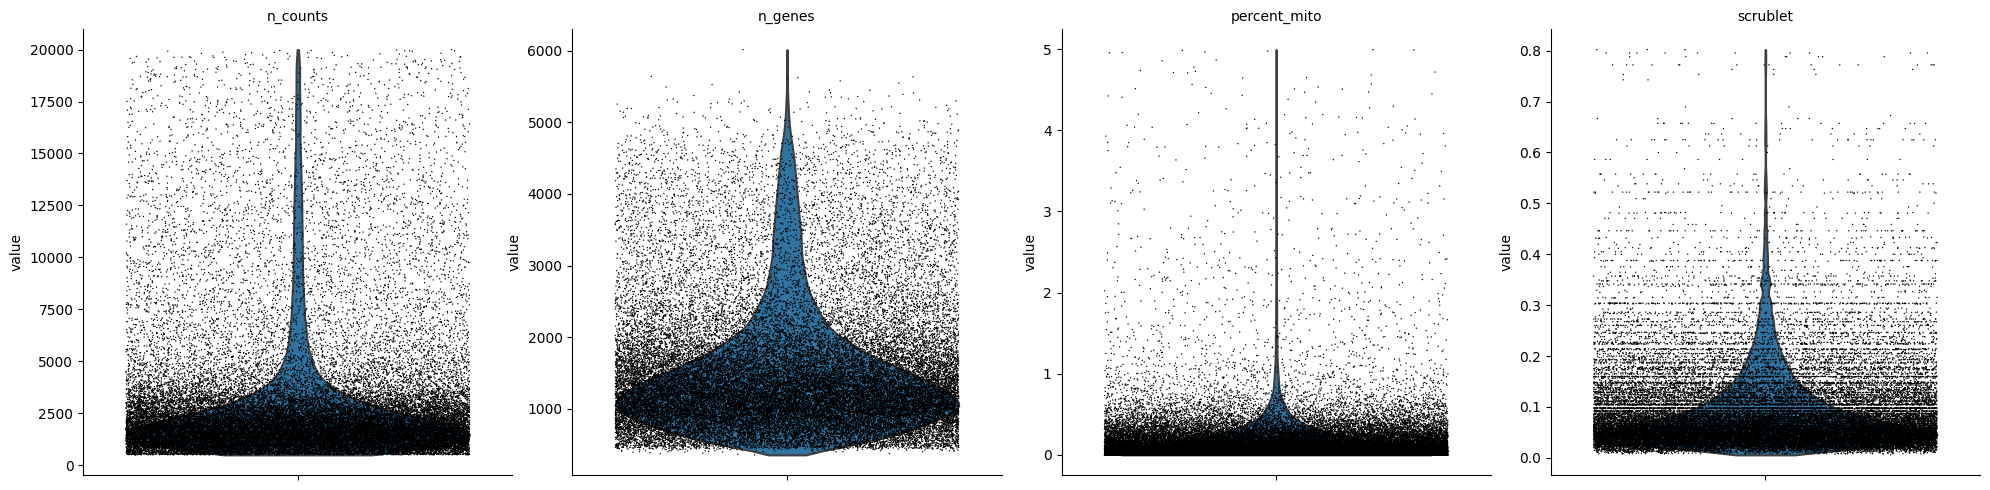

In [110]:
sc.pl.violin(adata_downsampled, ['n_counts', 'n_genes', 'percent_mito', 'scrublet'],\
             jitter=0.4, multi_panel=True)

In [111]:
## additional filtering to remove cells with <= 200 genes, mito and others

adata_downsampled = adata_downsampled[np.all([      #adata.obs['nFeature_RNA'] < 5000,
                            adata_downsampled.obs['percent_mito'] < 5,
                            adata_downsampled.obs["scrublet"] < 0.4], axis=0)]

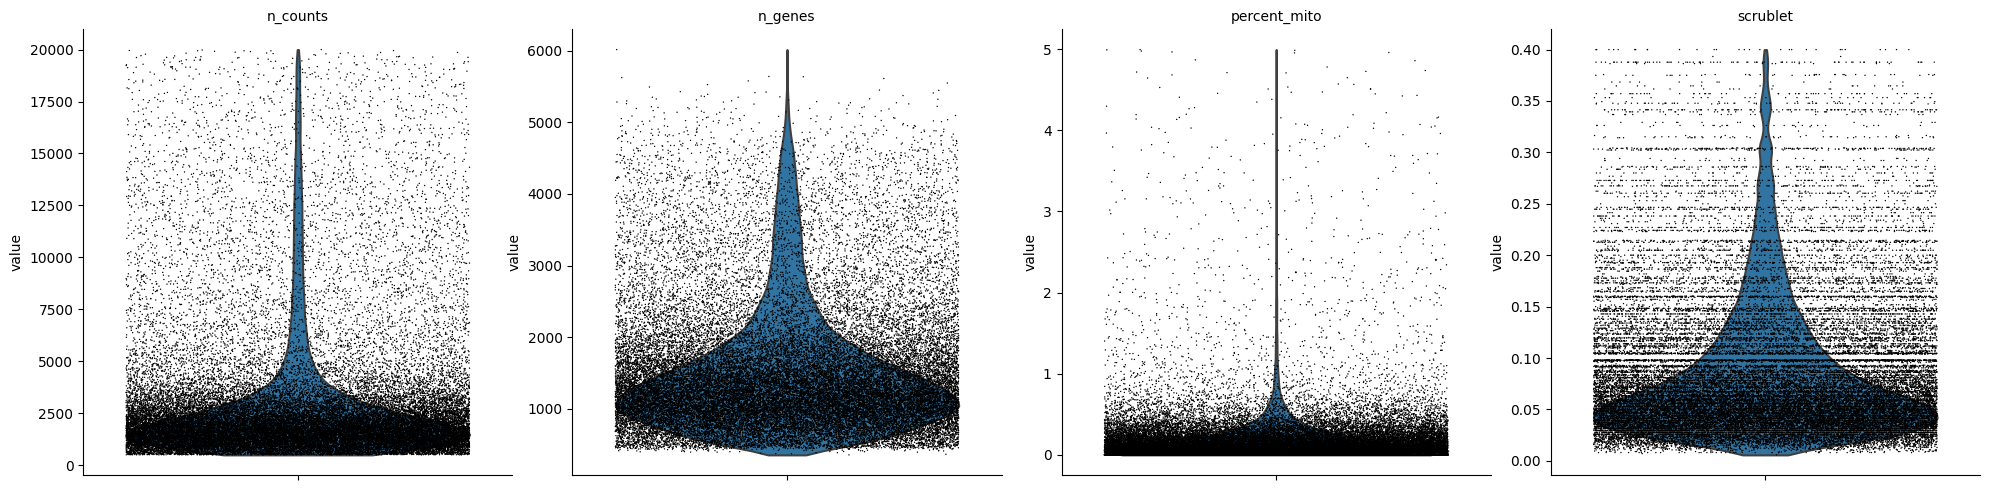

In [112]:
sc.pl.violin(adata_downsampled, ['n_counts', 'n_genes', 'percent_mito', 'scrublet'],\
             jitter=0.4, multi_panel=True)

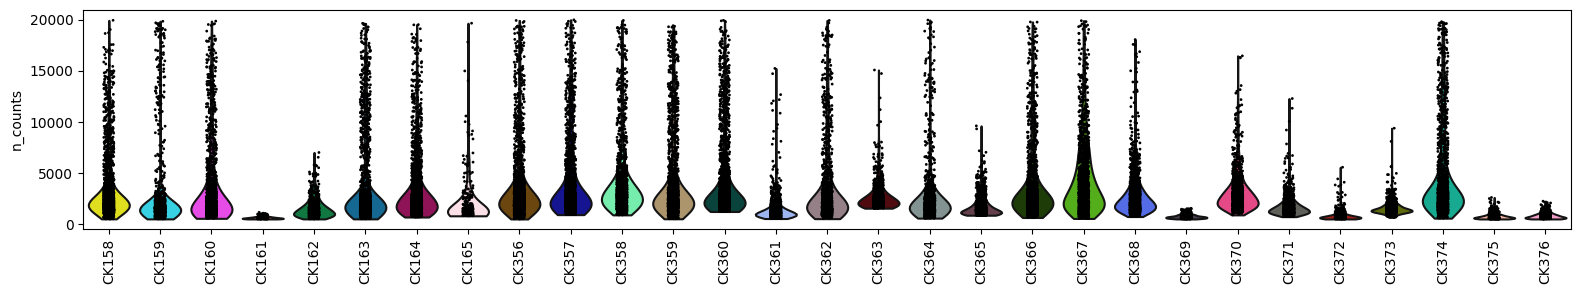

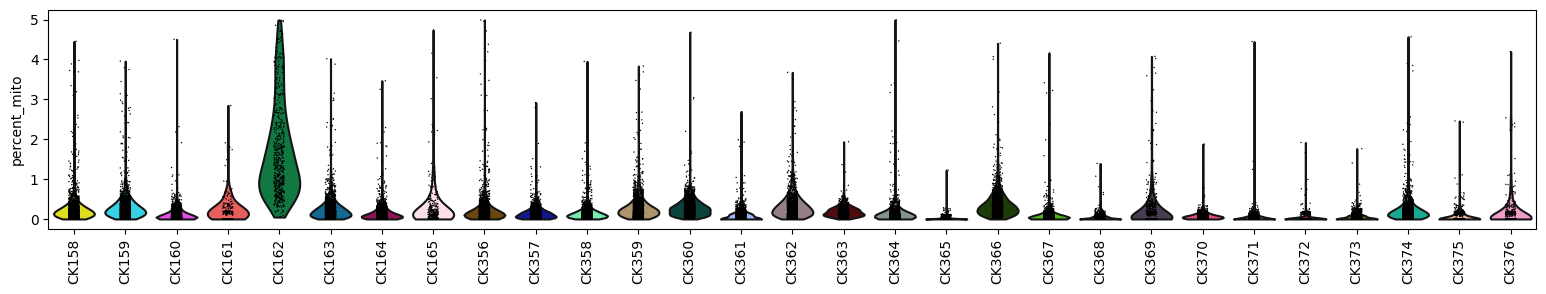

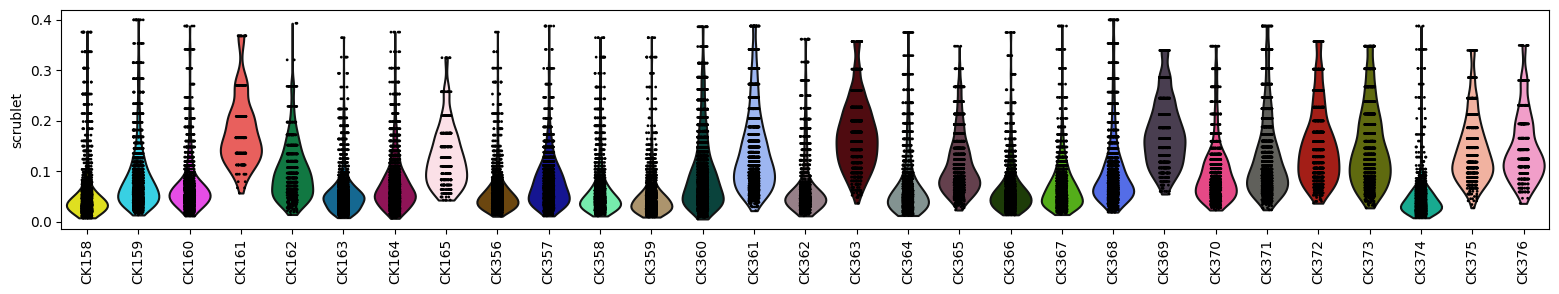

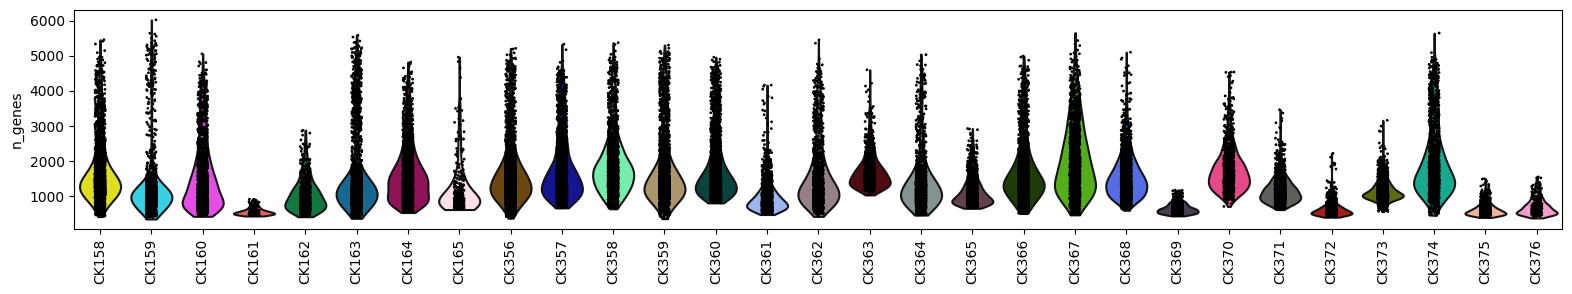

In [113]:
from matplotlib.pyplot import rc_context

with rc_context({'figure.figsize': (15, 3)}):
    #ax = temp_counter_df.plot.bar(x='orig.ident', y="index", rot=90,)
    
    t1 = sc.pl.violin(adata_downsampled, 'n_counts', groupby='sample', size=2, log=False, rotation=90, cut=0)#, figsize=(6,4))
    t2 = sc.pl.violin(adata_downsampled, 'percent_mito', groupby='sample', rotation=90)#, figsize=(6,4))
    t3 = sc.pl.violin(adata_downsampled, 'scrublet',
                      groupby='sample', size=2, log=False, rotation=90, cut=0)#, figsize=(6,4))
    t4 = sc.pl.violin(adata_downsampled, 'n_genes',
                      groupby='sample', size=2, log=False, rotation=90, cut=0)#, figsize=(6,4))

In [114]:
adata_downsampled

View of AnnData object with n_obs × n_vars = 38825 × 27593
    obs: 'sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score', 'dissociation_score', 'cell_type_original', 'patient_region_id', 'patient', 'patient_group', 'major_labl', 'final_cluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet'
    var: 'feature_biotype', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_type_original_colors', 'sample_colors'
    obsm: 'X_harmony', 'X_pca', 'X_umap'

In [115]:
# Check to make sure it's still counts
adata_downsampled[:,'TTN'].X.todense()

matrix([[ 5.],
        [ 6.],
        [11.],
        ...,
        [ 0.],
        [ 0.],
        [ 0.]], dtype=float32)

In [119]:
temp_counter_df = adata_downsampled.obs.reset_index()[["index", "sample"]].groupby("sample").count().reset_index()

from matplotlib.pyplot import rc_context

with rc_context({'figure.figsize': (15, 3)}):
    ax = temp_counter_df.plot.bar(x='sample', y="index", rot=90)

/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


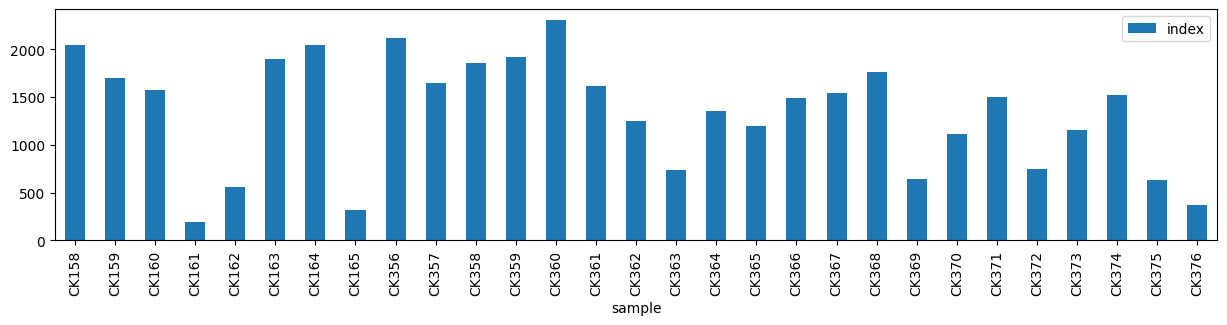

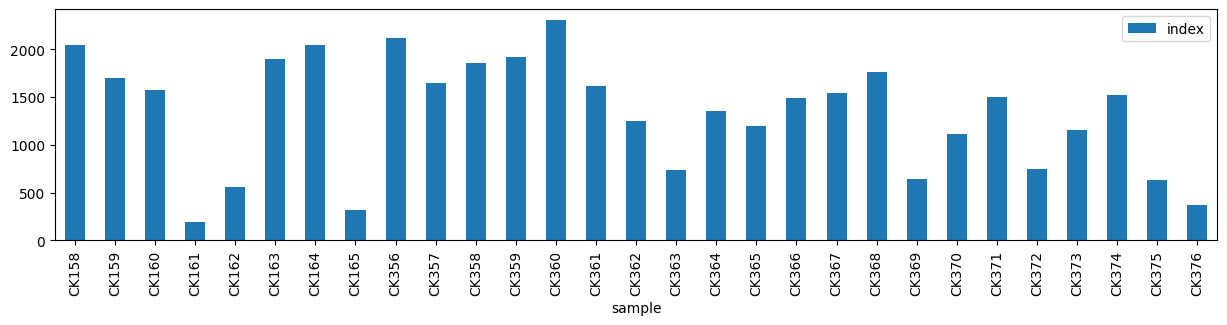

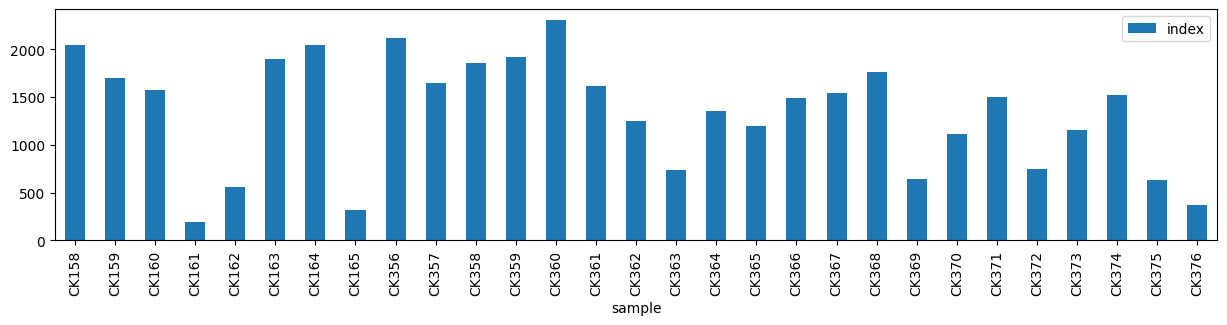

<Figure size 1200x1200 with 0 Axes>

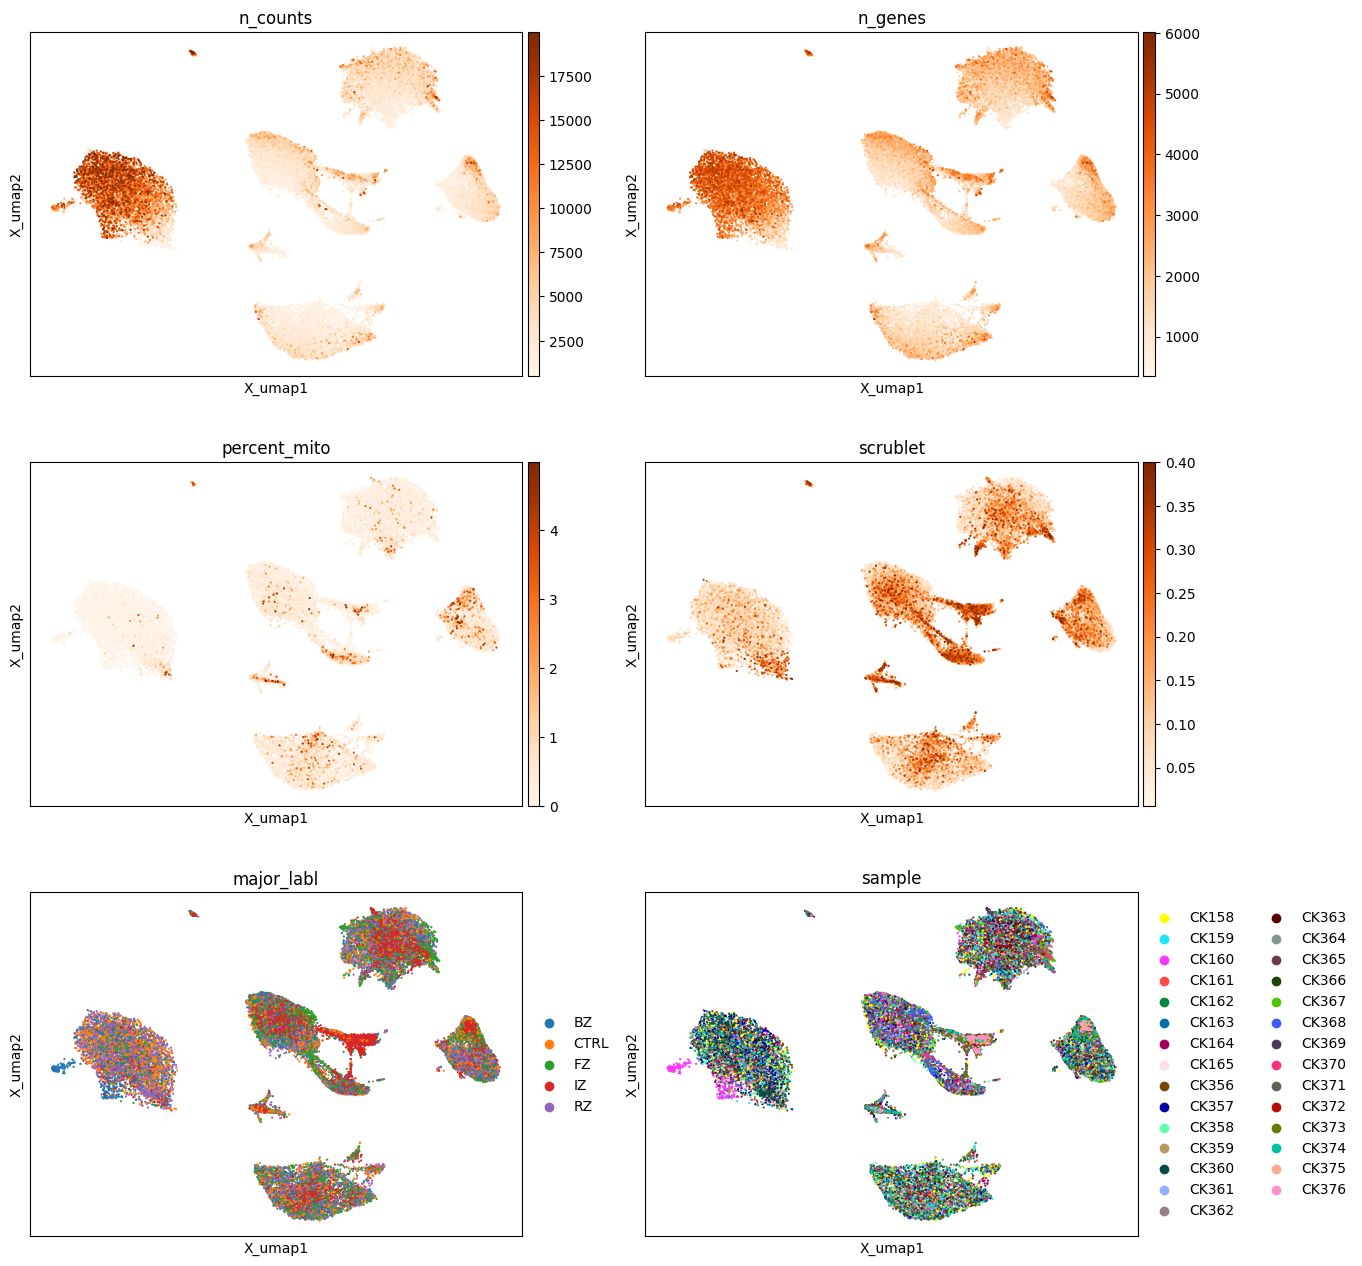

In [120]:
f = plt.figure(figsize = (12,12))

sc.pl.embedding(adata_downsampled, basis='X_umap', color=['n_counts', 'n_genes', 'percent_mito', 'scrublet'\
                                                          , 'major_labl', 'sample'], ncols=2,
                color_map='Oranges', size=10, show=True)
plt.tight_layout()

#plt.savefig('Kidney_ADPKD_Human_features.pdf', bbox_inches='tight')

In [116]:
adata_downsampled.write(datahome + filename[:-5] +'_scleaned.h5ad')